<a href="https://colab.research.google.com/github/mariyagolchin/Gene_Expression/blob/main/RNA_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNA-seq gene expression data for cancer classification
---
Data retrieved from https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [4]:
rna_exp = pd.read_csv('/content/drive/MyDrive/TCGA-PANCAN-HiSeq-801x20531/data.csv', index_col=[0])

In [6]:
labels = pd.read_csv('/content/drive/MyDrive/TCGA-PANCAN-HiSeq-801x20531/labels.csv', index_col=[0])

## Exploring data

In [7]:
labels.head()

,Class
sample_0,PRAD
sample_1,LUAD
sample_2,PRAD
sample_3,PRAD
sample_4,BRCA


In [8]:
rna_exp.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.0,0.0,0.0,0.0,0.591871,5.619994,1.334282,0.000000,9.796088,0.0,0.000000,1.598651,7.215116,10.839070,6.620204,9.513538,0.0,4.063658,7.764805,4.747656,13.714396,10.034496,0.000000,0.0,9.833458,0.000000,...,9.370304,10.362393,5.589928,8.141964,0.000000,2.736583,7.037152,7.123480,10.967399,5.902800,3.719370,7.203554,6.042557,2.602077,7.425526,7.846957,2.824951,6.239396,0.000000,8.469593,0.0,6.535978,6.968701,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.0,0.0,0.0,0.0,0.000000,11.055208,3.562621,0.000000,10.070470,0.0,0.000000,0.000000,9.949812,8.522476,1.174790,4.926991,0.0,0.000000,5.819832,1.327170,13.286240,6.663316,0.587845,0.0,9.533302,0.811142,...,8.882967,9.898199,7.069401,7.186134,0.000000,3.134993,6.648930,6.715701,9.536238,1.004394,5.555482,8.029260,6.366219,0.811142,7.991732,7.161001,0.000000,4.708877,0.811142,8.451689,0.0,7.242336,8.046284,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.0,0.0,0.0,0.0,1.683023,8.210248,4.195285,3.660427,8.970920,0.0,0.000000,0.796598,6.096650,9.861616,7.680507,3.119439,0.0,0.452595,7.899526,0.000000,10.731098,6.967883,0.452595,0.0,9.646323,0.452595,...,10.355637,10.423274,5.170201,6.194260,0.000000,3.677147,6.271990,7.089816,9.675220,0.000000,4.224017,8.020402,6.967883,5.014445,8.400038,7.527555,0.000000,4.997902,0.796598,7.761132,0.0,6.820460,8.048983,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.0,0.0,0.0,0.0,1.267356,8.306317,3.573556,0.000000,8.524616,0.0,0.000000,0.000000,3.913761,9.511573,6.469165,7.029895,0.0,1.267356,6.800641,7.742714,12.659474,8.299890,0.768587,0.0,9.670731,0.434882,...,10.074382,9.918261,7.117924,7.196145,0.434882,3.609755,8.896696,7.577096,10.731446,5.075383,2.175652,7.675435,6.840816,6.233192,8.899886,8.319085,1.791814,5.661134,1.464093,8.625727,0.0,7.420095,7.784746,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.0,0.0,0.0,0.0,0.889707,10.149150,2.967630,0.000000,8.047238,0.0,1.435949,0.000000,1.942120,8.821535,5.861429,7.755709,0.0,0.649386,5.570241,2.612801,13.556734,8.004754,0.000000,0.0,9.587569,0.649386,...,10.129154,10.062303,6.911620,7.855149,0.360982,3.655810,7.255520,7.292607,10.779793,3.954001,6.991148,8.153248,7.508444,4.586531,9.152227,8.227717,0.360982,6.227104,0.649386,8.151879,0.0,6.558289,8.673708,6.505099,8.948989,7.010

In [9]:
rna_merged = pd.concat([rna_exp, labels], axis=1)

In [10]:
rna_merged.shape

(801, 20532)

In [11]:
rna_merged.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.0,0.0,0.0,0.0,0.591871,5.619994,1.334282,0.000000,9.796088,0.0,0.000000,1.598651,7.215116,10.839070,6.620204,9.513538,0.0,4.063658,7.764805,4.747656,13.714396,10.034496,0.000000,0.0,9.833458,0.000000,...,10.362393,5.589928,8.141964,0.000000,2.736583,7.037152,7.123480,10.967399,5.902800,3.719370,7.203554,6.042557,2.602077,7.425526,7.846957,2.824951,6.239396,0.000000,8.469593,0.0,6.535978,6.968701,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.0,0.0,0.0,0.0,0.000000,11.055208,3.562621,0.000000,10.070470,0.0,0.000000,0.000000,9.949812,8.522476,1.174790,4.926991,0.0,0.000000,5.819832,1.327170,13.286240,6.663316,0.587845,0.0,9.533302,0.811142,...,9.898199,7.069401,7.186134,0.000000,3.134993,6.648930,6.715701,9.536238,1.004394,5.555482,8.029260,6.366219,0.811142,7.991732,7.161001,0.000000,4.708877,0.811142,8.451689,0.0,7.242336,8.046284,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.0,0.0,0.0,0.0,1.683023,8.210248,4.195285,3.660427,8.970920,0.0,0.000000,0.796598,6.096650,9.861616,7.680507,3.119439,0.0,0.452595,7.899526,0.000000,10.731098,6.967883,0.452595,0.0,9.646323,0.452595,...,10.423274,5.170201,6.194260,0.000000,3.677147,6.271990,7.089816,9.675220,0.000000,4.224017,8.020402,6.967883,5.014445,8.400038,7.527555,0.000000,4.997902,0.796598,7.761132,0.0,6.820460,8.048983,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.0,0.0,0.0,0.0,1.267356,8.306317,3.573556,0.000000,8.524616,0.0,0.000000,0.000000,3.913761,9.511573,6.469165,7.029895,0.0,1.267356,6.800641,7.742714,12.659474,8.299890,0.768587,0.0,9.670731,0.434882,...,9.918261,7.117924,7.196145,0.434882,3.609755,8.896696,7.577096,10.731446,5.075383,2.175652,7.675435,6.840816,6.233192,8.899886,8.319085,1.791814,5.661134,1.464093,8.625727,0.0,7.420095,7.784746,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.0,0.0,0.0,0.0,0.889707,10.149150,2.967630,0.000000,8.047238,0.0,1.435949,0.000000,1.942120,8.821535,5.861429,7.755709,0.0,0.649386,5.570241,2.612801,13.556734,8.004754,0.000000,0.0,9.587569,0.649386,...,10.062303,6.911620,7.855149,0.360982,3.655810,7.255520,7.292607,10.779793,3.954001,6.991148,8.153248,7.508444,4.586531,9.152227,8.227717,0.360982,6.227104,0.649386,8.151879,0.0,6.558289,8.673708,6.505099,8.948989,7.010366,7.364056,8.950646,8.233366,9.

In [12]:
exp = rna_merged.set_index('Class').sort_index()

In [13]:
exp.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BRCA,0.0,3.801873,5.025591,6.404150,9.564754,0.0,9.997688,1.025241,0.0,0.0,0.000000,1.618568,1.843341,2.500547,0.601887,0.0,0.0,0.0,0.000000,9.925035,5.114725,4.539767,9.229932,0.0,0.0,1.025241,1.025241,9.315641,6.015103,7.622886,0.601887,0.601887,8.031368,0.601887,13.553425,10.086919,1.618568,0.000000,9.297953,3.367105,...,10.167707,10.671063,6.389348,7.992423,0.000000,6.338481,6.268614,7.110436,8.204752,1.025241,6.389348,8.174956,7.199505,4.047024,9.116105,8.337662,0.000000,6.325595,1.025241,8.365102,0.0,6.664312,9.440203,7.505153,9.114757,6.957671,7.325917,8.055537,7.684272,9.055635,5.919628,8.507347,9.849333,8.184360,9.796564,11.607552,10.456272,9.949412,5.980037,0.000000
BRCA,0.0,3.277330,2.629846,6.000487,9.627027,0.0,8.375748,1.029559,0.0,0.0,0.760689,1.029559,2.462759,0.000000,1.029559,0.0,0.0,0.0,1.029559,10.057518,3.791168,3.176801,7.106107,0.0,0.0,0.000000,1.029559,8.926699,6.379725,6.850324,0.000000,0.429857,6.523294,2.044114,13.793349,8.568788,2.044114,0.429857,9.509642,1.256105,...,10.187315,10.839393,6.720908,8.142225,0.000000,5.289775,7.824227,7.187283,10.188168,5.010860,6.565678,7.762535,7.061819,4.793329,9.164316,8.375748,0.000000,6.330790,1.624241,8.315716,0.0,6.944741,8.253072,7.765594,8.354483,8.523523,7.464734,9.023219,8.399479,8.266145,6.152192,9.015499,10.244994,5.172335,9.788066,11.582057,11.098776,9.909158,5.494595,0.000000
BRCA,0.0,1.149975,0.462576,5.861427,10.092440,0.0,5.445833,1.045932,0.0,0.0,0.000000,0.000000,2.319762,0.340505,0.000000,0.0,0.0,0.0,1.973758,9.758753,2.885203,5.416370,7.946468,0.0,0.0,0.340505,3.167535,7.848235,6.037367,7.584692,0.340505,0.000000,6.018060,0.846794,12.513513,7.171917,0.340505,0.000000,9.233008,0.000000,...,10.088576,9.689568,6.238930,7.682419,0.000000,5.141216,7.131415,7.732032,8.182856,0.000000,6.557033,7.080061,7.046818,1.973758,9.594621,8.095703,0.340505,5.436995,1.220825,8.393922,0.0,7.136878,7.817924,4.371322,8.757313,7.682250,7.983353,9.086720,8.810890,8.922326,6.494526,9.549727,10.037602,6.636375,9.459339,10.109922,10.442394,9.574616,3.541862,0.000000
BRCA,0.0,4.538159,3.955722,6.259862,9.103243,0.0,6.918327,1.162726,0.0,0.0,0.695459,1.023113,2.415678,1.289952,0.000000,0.0,0.0,0.0,0.000000,10.547483,4.699435,6.898535,7.061225,0.0,0.0,1.162726,0.868529,7.387233,6.274094,6.087749,0.000000,2.804756,6.291386,1.406918,14.570372,7.264743,0.868529,0.000000,9.670800,0.000000,...,10.234674,11.042241,6.743111,8.286045,0.270828,5.073949,8.553549,7.199240,9.306959,2.804756,6.857969,7.974524,7.143577,5.053463,9.752839,8.419914,0.270828,5.877975,1.162726,8.336676,0.0,7.314243,7.319844,7.256973,9.667140,7.676944,7.799217,9.285164,8.625596,7.639594,7.102994,9.813018,10.629311,7.128757,10.409104,11.195225,11.169593,10.513451,6.729131,0.270828
BRCA,0.0,2.599770,2.562792,7.365491,10.462155,0.0,7.922370,0.000000,0.0,0.0,0.468323,0.821302,2.383552,1.722859,0.000000,0.0,0.0,0.0,0.000000,9.727432,4.361572,0.000000,9.081350,0.0,0.0,0.000000,1.544683,10.091224,5.507259,6.955801,0.000000,0.000000,7.126374,1.341360,12.860199,7.922370,0.468323,0.000000,10.075920,0.468323,...,9.795004,10.092559,5.495046,9.020866,0.000000,4.545524,7.803589,9.003723,10.975748,4.

In [14]:
exp.shape

(801, 20531)

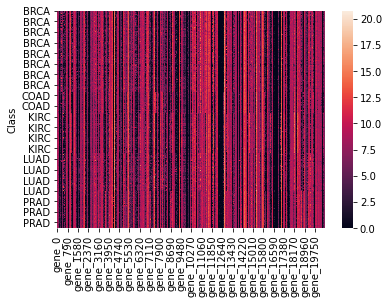

In [15]:
sns.heatmap(exp)

In [ ]:
# sns.clustermap(exp)

In [16]:
exp.index.value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

In [17]:
exp.isnull().values.any()

False

## Unsupervised Learning
---
### 1. Visualization and dimensionality reduction

#### 1.1 PCA
Principal component analysis

In [18]:
features = list(exp.columns.values)
len(features)
#x = exp.loc[:,features].values

20531

In [19]:
x = rna_exp[features].reset_index(drop=True)
y = labels

In [20]:
x.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.0,0.0,0.0,0.0,0.591871,5.619994,1.334282,0.000000,9.796088,0.0,0.000000,1.598651,7.215116,10.839070,6.620204,9.513538,0.0,4.063658,7.764805,4.747656,13.714396,10.034496,0.000000,0.0,9.833458,0.000000,...,9.370304,10.362393,5.589928,8.141964,0.000000,2.736583,7.037152,7.123480,10.967399,5.902800,3.719370,7.203554,6.042557,2.602077,7.425526,7.846957,2.824951,6.239396,0.000000,8.469593,0.0,6.535978,6.968701,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.0,0.0,0.0,0.0,0.000000,11.055208,3.562621,0.000000,10.070470,0.0,0.000000,0.000000,9.949812,8.522476,1.174790,4.926991,0.0,0.000000,5.819832,1.327170,13.286240,6.663316,0.587845,0.0,9.533302,0.811142,...,8.882967,9.898199,7.069401,7.186134,0.000000,3.134993,6.648930,6.715701,9.536238,1.004394,5.555482,8.029260,6.366219,0.811142,7.991732,7.161001,0.000000,4.708877,0.811142,8.451689,0.0,7.242336,8.046284,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.0,0.0,0.0,0.0,1.683023,8.210248,4.195285,3.660427,8.970920,0.0,0.000000,0.796598,6.096650,9.861616,7.680507,3.119439,0.0,0.452595,7.899526,0.000000,10.731098,6.967883,0.452595,0.0,9.646323,0.452595,...,10.355637,10.423274,5.170201,6.194260,0.000000,3.677147,6.271990,7.089816,9.675220,0.000000,4.224017,8.020402,6.967883,5.014445,8.400038,7.527555,0.000000,4.997902,0.796598,7.761132,0.0,6.820460,8.048983,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.0,0.0,0.0,0.0,1.267356,8.306317,3.573556,0.000000,8.524616,0.0,0.000000,0.000000,3.913761,9.511573,6.469165,7.029895,0.0,1.267356,6.800641,7.742714,12.659474,8.299890,0.768587,0.0,9.670731,0.434882,...,10.074382,9.918261,7.117924,7.196145,0.434882,3.609755,8.896696,7.577096,10.731446,5.075383,2.175652,7.675435,6.840816,6.233192,8.899886,8.319085,1.791814,5.661134,1.464093,8.625727,0.0,7.420095,7.784746,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.0,0.0,0.0,0.0,0.889707,10.149150,2.967630,0.000000,8.047238,0.0,1.435949,0.000000,1.942120,8.821535,5.861429,7.755709,0.0,0.649386,5.570241,2.612801,13.556734,8.004754,0.000000,0.0,9.587569,0.649386,...,10.129154,10.062303,6.911620,7.855149,0.360982,3.655810,7.255520,7.292607,10.779793,3.954001,6.991148,8.153248,7.508444,4.586531,9.152227,8.227717,0.360982,6.227104,0.649386,8.151879,0.0,6.558289,8.673708,6.505099,8.948989,7.010366,7.364056,8.950646,8.233366,9.29

In [21]:
y = y.reset_index(drop=True)
y.head()

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA


Rescale dataframe 

In [22]:
x_std_scale = StandardScaler().fit_transform(x)

In [23]:
x_std_scale

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

In [24]:
n_classes = len(y.groupby('Class'))
n_classes

5

In [25]:
pca = PCA(n_components=2)
principal_component = pca.fit_transform(x)

In [27]:
principal_df = pd.DataFrame(data=principal_component, columns=['Principal Component 1', 'Principal Component 2'])

In [28]:
principal_df.head()

,Principal Component 1,Principal Component 2
0,-62.755415,-94.071973
1,-2.432896,90.585842
2,-71.266853,-8.064608
3,-84.770785,-73.244566
4,-69.560171,-9.612940


In [29]:
concat_df = pd.concat([principal_df, y['Class']], axis=1)

In [30]:
concat_df.head()

,Principal Component 1,Principal Component 2,Class
0,-62.755415,-94.071973,PRAD
1,-2.432896,90.585842,LUAD
2,-71.266853,-8.064608,PRAD
3,-84.770785,-73.244566,PRAD
4,-69.560171,-9.612940,BRCA


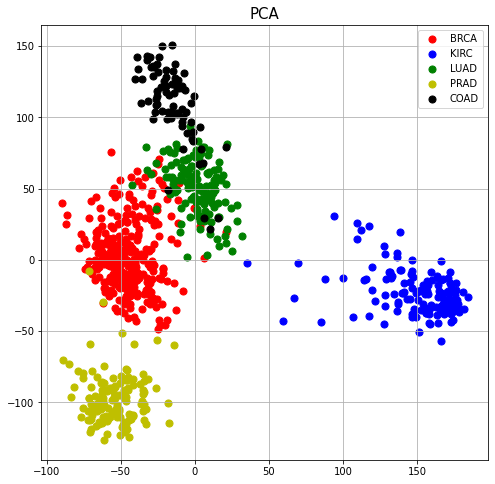

In [31]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_title('PCA', fontsize=15)
labels_list = ['BRCA', 'KIRC', 'LUAD', 'PRAD', 'COAD']
colors = ['r', 'b', 'g', 'y', 'black']

for lab, color in zip(labels_list, colors):
    indices = concat_df['Class'] == lab
    ax.scatter(concat_df.loc[indices, 'Principal Component 1'],
              concat_df.loc[indices, 'Principal Component 2'], 
              c = color,
              s = 50)
    ax.legend(labels_list)
    ax.grid()
               
    

#### 1.2 t-SNE
t-distributed Stochastic Neighbor Embedding 

In [32]:
tsne = TSNE(n_components=2, random_state=0)
tsne_rnaexp = tsne.fit_transform(x)

In [33]:
tsne_df = pd.DataFrame(data=tsne_rnaexp, columns=['tsne 1', 'tsne 2'])

In [34]:
tsne_df.head()

,tsne 1,tsne 2
0,-3.275846,-35.061005
1,3.172299,32.197090
2,0.114339,-42.285568
3,-1.121696,-42.197300
4,25.348589,-7.444631


In [35]:
tsne_concat_df = pd.concat([tsne_df, y['Class']], axis=1)

In [36]:
tsne_concat_df.head()

,tsne 1,tsne 2,Class
0,-3.275846,-35.061005,PRAD
1,3.172299,32.197090,LUAD
2,0.114339,-42.285568,PRAD
3,-1.121696,-42.197300,PRAD
4,25.348589,-7.444631,BRCA


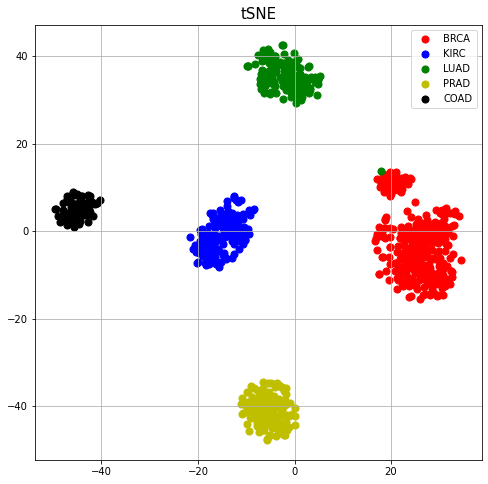

In [37]:
fig_2 = plt.figure(figsize=(8,8))
ax_2 = fig_2.add_subplot(1,1,1)
ax_2.set_title('tSNE', fontsize=15)
labels_list_2 = ['BRCA', 'KIRC', 'LUAD', 'PRAD', 'COAD']
colors_2 = ['r', 'b', 'g', 'y', 'black']

for lab, color in zip(labels_list_2, colors_2):
    indices_2 = tsne_concat_df['Class'] == lab
    ax_2.scatter(tsne_concat_df.loc[indices_2, 'tsne 1'],
              tsne_concat_df.loc[indices_2, 'tsne 2'], 
              c = color,
              s = 50)
    ax_2.legend(labels_list_2)
    ax_2.grid()


## Supervised Machine Learning
---
### 1. K-Nearest neighbors classifier 



In [38]:
bool_array = np.random.rand(len(x)) < 0.7

In [39]:
x_train = x[bool_array]
y_train = y[bool_array]
x_test = x[~bool_array]
y_test = y[~bool_array]

In [40]:
len(x_train), len(y_train), len(x_test), len(y_test)

(557, 557, 244, 244)

In [41]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
knn_pred = knn.predict(x_test)

In [43]:
knn.score(x_train, y_train), knn.score(x_test, y_test)

(1.0, 0.9959016393442623)

In [44]:
knn_count = 0
knn_correct = 0
for i in range(len(y_test)):
    knn_count += 1
    if knn_pred[i] == y_test.values.ravel()[i]:
        knn_correct += 1
knn_correct/knn_count
    

0.9959016393442623

### 2. Support Vector Machines (SVMs)

In [45]:
svm = SVC()
svm.fit(x_train, y_train.values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
svm.score(x_train, y_train), svm.score(x_test, y_test)

(1.0, 0.9959016393442623)

### 3. Decision Tree

In [47]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train.values.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
tree_clf.score(x_train, y_train), tree_clf.score(x_test, y_test)

(1.0, 0.9877049180327869)

In [49]:
export_graphviz(tree_clf, 
                out_file='/content/drive/MyDrive/TCGA-PANCAN-HiSeq-801x20531/my_tree.dot', 
                feature_names=x.columns.values, 
                class_names= labels_list_2, 
                filled=True, 
                rounded=True, 
                special_characters=True)  